# Application Example

### Step 1: Load basic python libraries 

In [68]:
# This is used to display images within the browser 
%matplotlib inline 
import os
import numpy as np
import matplotlib.pyplot as plt
import dicom as pydicom # library to load dicom images 
try:
    import cPickle as pickle
except:
    import pickle
from sklearn.preprocessing import StandardScaler
import nibabel as nib

### Step 2: Load the classifier and the images 
    # load a classifier that has been saved in pickle form
        with open('my_dumped_classifier.pkl', 'rb') as fid:
        gnb_loaded = cPickle.load(fid)

In [69]:
with open('RBF SVM.pkl', 'rb') as fid:
    classifier = pickle.load(fid)
print (dir(classifier))

['C', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__getstate__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_check_proba', '_compute_kernel', '_decision_function', '_dense_decision_function', '_dense_fit', '_dense_predict', '_dense_predict_proba', '_dual_coef_', '_estimator_type', '_gamma', '_get_coef', '_get_param_names', '_impl', '_intercept_', '_pairwise', '_predict_log_proba', '_predict_proba', '_sparse', '_sparse_decision_function', '_sparse_fit', '_sparse_kernels', '_sparse_predict', '_sparse_predict_proba', '_validate_for_predict', '_validate_targets', '_warn_from_fit_status', 'cache_size', 'class_weight', 'class_weight_', 'classes_', 'coef0', 'coef_', 'decision_function', 'decision_function_s

# Step 3: Load the unknown image and perform the segmetnation

In [70]:
CurrentDir= os.getcwd()
# Print current directory
print (CurrentDir)
# Get parent direcotry 
print(os.path.abspath(os.path.join(CurrentDir, os.pardir)))
# Create the file paths. The images are contained in a subfolder called Data. 
PostName =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data",  'POST.nii.gz')  )
PreName =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data", 'PRE.nii.gz') )
FLAIRName =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data", 'FLAIR.nii.gz') )
GT =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data", 'GroundTruth.nii.gz') )
# read Pre in--we assume that all images are same x,y dims
Pre = nib.load(PreName)
# Pre is a class containing the image data among other information 
Pre=Pre.get_data()
xdim = np.shape(Pre)[0]
ydim = np.shape(Pre)[1]
zdim = np.shape(Pre)[2]
# Printing the dimensions of an image 
print ('Dimensions')
print (xdim,ydim,zdim)
# make space in a numpy array for the images
ArrayDicom = np.zeros((xdim, ydim, 2), dtype=Pre.dtype)
# copy Pre pixels into z=0
Pre=Pre[:,:,55]
ArrayDicom[:, :, 0] = Post/ np.mean(Post[np.nonzero(Post)])
# Post
Post = nib.load(PostName)
# Pre is a class containing the image data among other information 
Post=Post.get_data()
Post= Post[:,:,55]
ArrayDicom[:, :,  1] = Pre/ np.mean(Pre[np.nonzero(Pre)])

/Users/m112447/Dropbox/MachineLearningForMedicalImages/notebooks
/Users/m112447/Dropbox/MachineLearningForMedicalImages
Dimensions
(240, 240, 155)


# Step 4: Use the pretrained classifier to perform segmentation

#### Reshape the data

In [71]:
print ('Shape before reshape')
print (np.shape(ArrayDicom))
ArrayDicom=ArrayDicom.reshape(-1,2)
print ('Shape after reshape')
print (np.shape(ArrayDicom))

Shape before reshape
(240, 240, 2)
Shape after reshape
(57600, 2)


#### Appy trained classifier 

In [72]:
# ArrayDicom = StandardScaler().fit_transform(ArrayDicom)
Labels=classifier.predict(ArrayDicom)
print (Labels)

[ 0.  0.  0. ...,  0.  0.  0.]


#### Visualize results

1.0
(57600,)


(-0.5, 239.5, 239.5, -0.5)

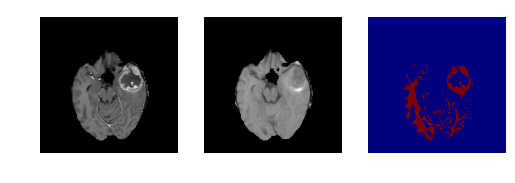

In [73]:
print (np.mean(Labels[np.nonzero(Labels)]))
print (np.shape(Labels))
# respape to image
Labels=Labels.reshape(240,240)
Post=Post.reshape(240,240)
Pre=Pre.reshape(240,240)
f, (ax1,ax2,ax3)=plt.subplots(1,3)
ax1.imshow(np.rot90(Post[:, :],3), cmap=plt.cm.gray)
ax1.axis('off')
ax2.imshow(np.rot90(Pre[:, :],3), cmap=plt.cm.gray)
ax2.axis('off')
ax3.imshow(np.rot90(Labels[:, :,],3), cmap=plt.cm.jet)
ax3.axis('off')
